In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data
import yfinance as yf

In [6]:
#Reading the data for the past 13 years.
df = yf.download('EURUSD=X','2003-01-01','2021-12-15',auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,0


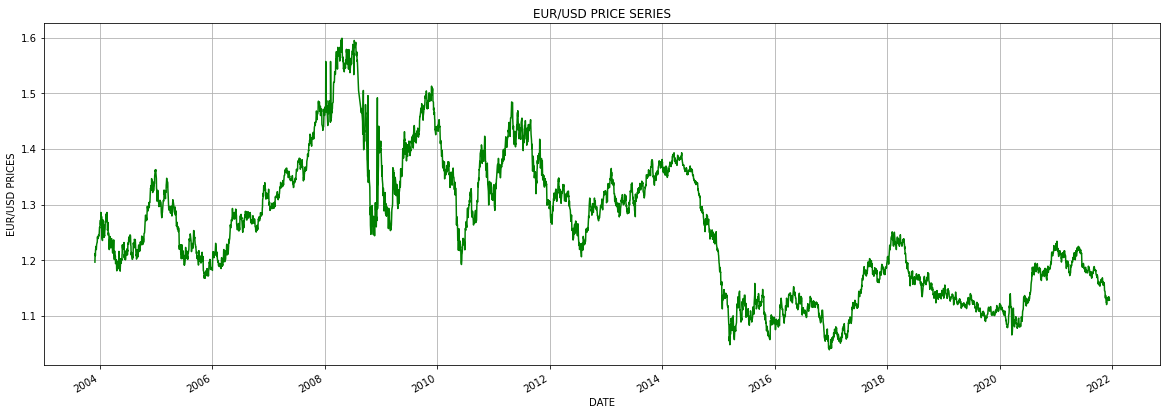

In [8]:


df['Close'].plot(figsize=(20,7),color='g',grid=True)
plt.xlabel('DATE')
plt.ylabel('EUR/USD PRICES')
plt.title('EUR/USD PRICE SERIES')
plt.show()



In [11]:
df.shape

(4678, 5)

In [27]:
data = df.iloc[:,0:4]

In [28]:
data.head()

,Open,High,Low,Close
Date,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501
2003-12-02,1.196101,1.210903,1.194600,1.208897
2003-12-03,1.209000,1.213003,1.207700,1.212298
2003-12-04,1.212004,1.214403,1.204398,1.208094
2003-12-05,1.207802,1.219096,1.206593,1.218695


In [29]:
data['Return']=data['Close'].pct_change().shift(-1)



In [30]:
data.head()

,Open,High,Low,Close,Return
Date,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0.010360
2003-12-02,1.196101,1.210903,1.194600,1.208897,0.002813
2003-12-03,1.209000,1.213003,1.207700,1.212298,-0.003467
2003-12-04,1.212004,1.214403,1.204398,1.208094,0.008775
2003-12-05,1.207802,1.219096,1.206593,1.218695,0.002713


In [41]:
data['BuySignal']=np.where(data['Open']>data['Close'],1,0)
data['SellSignal']=np.where(data['High']>data['Low']+0.009,-1,0)


In [42]:
data.head(30)

,Open,High,Low,Close,Return,Signal,BuySignal,SellSignal
Date,,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0.010360,1,1,-1
2003-12-02,1.196101,1.210903,1.194600,1.208897,0.002813,0,0,-1
2003-12-03,1.209000,1.213003,1.207700,1.212298,-0.003467,0,0,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,0.008775,1,1,-1
2003-12-05,1.207802,1.219096,1.206593,1.218695,0.002713,0,0,-1
2003-12-08,1.216797,1.224005,1.215407,1.222001,0.002450,0,0,0
2003-12-09,1.222105,1.227702,1.219795,1.224995,-0.004815,0,0,0
2003-12-10,1.224905,1.226603,1.216205,1.219096,0.002714,1,1,-1
2003-12-11,1.219096,1.223496,1.212298,1.222404,0.004494,0,0,-1


In [43]:
del data['Signal']

In [44]:
data.head(30)

,Open,High,Low,Close,Return,BuySignal,SellSignal
Date,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0.010360,1,-1
2003-12-02,1.196101,1.210903,1.194600,1.208897,0.002813,0,-1
2003-12-03,1.209000,1.213003,1.207700,1.212298,-0.003467,0,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,0.008775,1,-1
2003-12-05,1.207802,1.219096,1.206593,1.218695,0.002713,0,-1
2003-12-08,1.216797,1.224005,1.215407,1.222001,0.002450,0,0
2003-12-09,1.222105,1.227702,1.219795,1.224995,-0.004815,0,0
2003-12-10,1.224905,1.226603,1.216205,1.219096,0.002714,1,-1
2003-12-11,1.219096,1.223496,1.212298,1.222404,0.004494,0,-1


In [69]:
data['FinalSignal']=np.where(((data['BuySignal'] >= 1) & (data['SellSignal'] == 0)),1,0)

In [70]:
data.head(30)

,Open,High,Low,Close,Return,BuySignal,SellSignal,FinalSignal
Date,,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0.010360,1,-1,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,0.002813,0,-1,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,-0.003467,0,0,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,0.008775,1,-1,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,0.002713,0,-1,0
2003-12-08,1.216797,1.224005,1.215407,1.222001,0.002450,0,0,0
2003-12-09,1.222105,1.227702,1.219795,1.224995,-0.004815,0,0,0
2003-12-10,1.224905,1.226603,1.216205,1.219096,0.002714,1,-1,0
2003-12-11,1.219096,1.223496,1.212298,1.222404,0.004494,0,-1,0


In [72]:
data['FinalSignalOut']=np.where(((data['BuySignal'] == 0) & (data['SellSignal'] == -1)),1,0)

In [73]:
data.head(30)

,Open,High,Low,Close,Return,BuySignal,SellSignal,FinalSignal,FinalSignalOut
Date,,,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0.010360,1,-1,0,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,0.002813,0,-1,0,1
2003-12-03,1.209000,1.213003,1.207700,1.212298,-0.003467,0,0,0,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,0.008775,1,-1,0,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,0.002713,0,-1,0,1
2003-12-08,1.216797,1.224005,1.215407,1.222001,0.002450,0,0,0,0
2003-12-09,1.222105,1.227702,1.219795,1.224995,-0.004815,0,0,0,0
2003-12-10,1.224905,1.226603,1.216205,1.219096,0.002714,1,-1,0,0
2003-12-11,1.219096,1.223496,1.212298,1.222404,0.004494,0,-1,0,1


In [90]:
data['SumBuySignals']=data['Return']*data['BuySignal']*100

In [94]:
cumulative_ret = (data['SumBuySignals'] + 1).cumprod()

<AxesSubplot:xlabel='Date'>

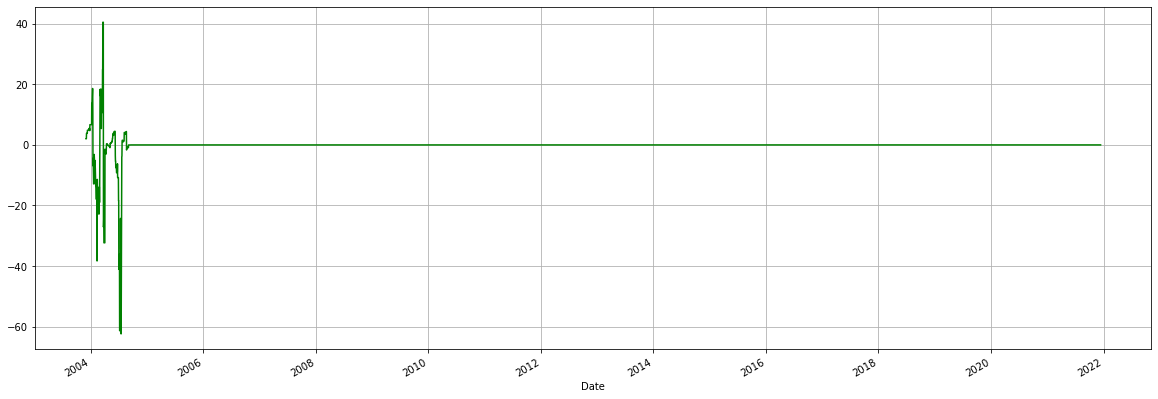

In [95]:
cumulative_ret.plot(figsize=(20,7),color='g',grid=True)

In [96]:
cumulative_ret

Date
2003-12-01     2.036029e+00
2003-12-02     2.036029e+00
2003-12-03     2.036029e+00
2003-12-04     3.822546e+00
2003-12-05     3.822546e+00
                  ...      
2021-12-08    5.046760e-114
2021-12-09    5.046760e-114
2021-12-10    5.874558e-114
2021-12-13    5.874558e-114
2021-12-14              NaN
Name: SumBuySignals, Length: 4678, dtype: float64